# Обработка пропусков в данных

## Описание датасета

Набор данных хранит значения о жилье в Бостоне

## Обработка датасета


### Импорт библиотек


In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
sns.set(style="ticks")

### Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas. Исходный датасет имеет расширение .xlsx, поэтому будем использовать метод read_excel()

In [104]:
data = pd.read_excel('./datasets/HousingData.xlsx')

### Первичный анализ данных

In [105]:
total_row_count = data.shape[0]
print(f'Всего строк: {total_row_count}')

Всего строк: 506


### Модификация датасета

Поскольку по задаче требуется обработать один категориальный признак и один количественный, а категориальных признаков датасет не имеет, то создадим категориальный признак на основе числового. Будем использовать столбец RAD, принимающий значения от 1 до 24. Заменим эти числа на названия улиц.

Помимо этого, чтобы добиться наличия пропусков в данном столбце, заменим строки со значением 2 и 13 на пропуски.

In [106]:
# Создаем список названий улиц, соответствующих числовым значениям
streets = ['Улица 1', np.nan, 'Улица 3', 'Улица 4', 'Улица 5', 'Улица 6', 'Улица 7', 'Улица 8', 
           'Улица 9', 'Улица 10', 'Улица 11', 'Улица 12', np.nan, 'Улица 14', 'Улица 15', 'Улица 16',
           'Улица 17', 'Улица 18', 'Улица 19', 'Улица 20', 'Улица 21', 'Улица 22', 'Улица 23', 'Улица 24']

# Создаем словарь соответствия числовых значений и названий улиц
street_mapping = {i: street for i, street in enumerate(streets, start=1)}

# Преобразуем числовые значения в названия улиц
data['RAD_encoded'] = data['RAD'].map(street_mapping)

# Выводим преобразованный DataFrame
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV RAD_encoded  
0       15.3  396.90   4.98  24.0     Улица 1  
1       17.8  396.90   9.14

### Обработка пропусков в данных для **категориального признака** (столбец RAD_encoded)

#### Удаление пропусков

In [107]:
# Удаление строк, содержащих пустые значения только в столбце 'RAD_encoded'
data_clear_rad = data.dropna(subset=['RAD_encoded'])

# Вывод размеров исходного и очищенного DataFrame для сравнения
print(data.shape, data_clear_rad.shape)

# Выводим преобразованный DataFrame
print(data_clear_rad)

(506, 15) (482, 15)
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
6    0.08829  12.5   7.87   NaN  0.524  6.012  66.6  5.5605    5  311   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV RAD_encoded  
0       15.3  396.90   4.98  24.0     Улица 1  
3      

#### Импьютация

Поскольку требуется заполнить пропуски в категориальном признаке, при этом его нельзя кодировать, то мы не можем применить ни один из методов импьютации из списка 'mean', 'median', 'most_frequent'. Поэтому будем использовать заполнение предыдущим значением.

In [108]:
# Заполнение пропущенных значений в столбце 'RAD_encoded' предыдущим значением
data['RAD_encoded'].fillna(method='ffill', inplace=True)

# Выводим преобразованный DataFrame
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV RAD_encoded  
0       15.3  396.90   4.98  24.0     Улица 1  
1       17.8  396.90   9.14

/tmp/ipykernel_1036301/2218032366.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RAD_encoded'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_1036301/2218032366.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['RAD_encoded'].fillna(method='ffill', inplace=True)


### Обработка пропусков в данных для **количественного признака** (столбец LSTAT)

#### Удаление пропусков

In [109]:
# Удаление строк, содержащих пустые значения только в столбце 'LSTAT'
data_clear_lstat = data.dropna(subset=['LSTAT'])

# Вывод размеров исходного и очищенного DataFrame для сравнения
print(data.shape, data_clear_lstat.shape)

# Выводим преобразованный DataFrame
print(data_clear_lstat)

(506, 15) (486, 15)
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV RAD_encoded  
0       15.3  396.90   4.98  24.0     Улица 1  
1      

#### Импьютация

In [110]:
data_median = data.copy()

# Вычисляем медианное значение для столбца 'LSTAT'
median_value = data_median['LSTAT'].median()

# Заполняем пропущенные значения в копии DataFrame медианным значением
data_median['LSTAT'].fillna(median_value, inplace=True)

# Выводим измененный DataFrame
print(data_median)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV RAD_encoded  
0       15.3  396.90   4.98  24.0     Улица 1  
1       17.8  396.90   9.14

/tmp/ipykernel_1036301/2055872278.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_median['LSTAT'].fillna(median_value, inplace=True)


In [111]:
data_mean = data.copy()

# Вычисляем среднее значение для столбца 'LSTAT'
mean_value = data_mean['LSTAT'].mean()

# Заполняем пропущенные значения в копии DataFrame медианным значением
data_mean['LSTAT'].fillna(mean_value, inplace=True)

# Выводим измененный DataFrame
print(data_mean)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B      LSTAT  MEDV RAD_encoded  
0       15.3  396.90   4.980000  24.0     Улица 1  
1       17.8  396.9

/tmp/ipykernel_1036301/3354774644.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_mean['LSTAT'].fillna(mean_value, inplace=True)


## Построение парных диаграмм

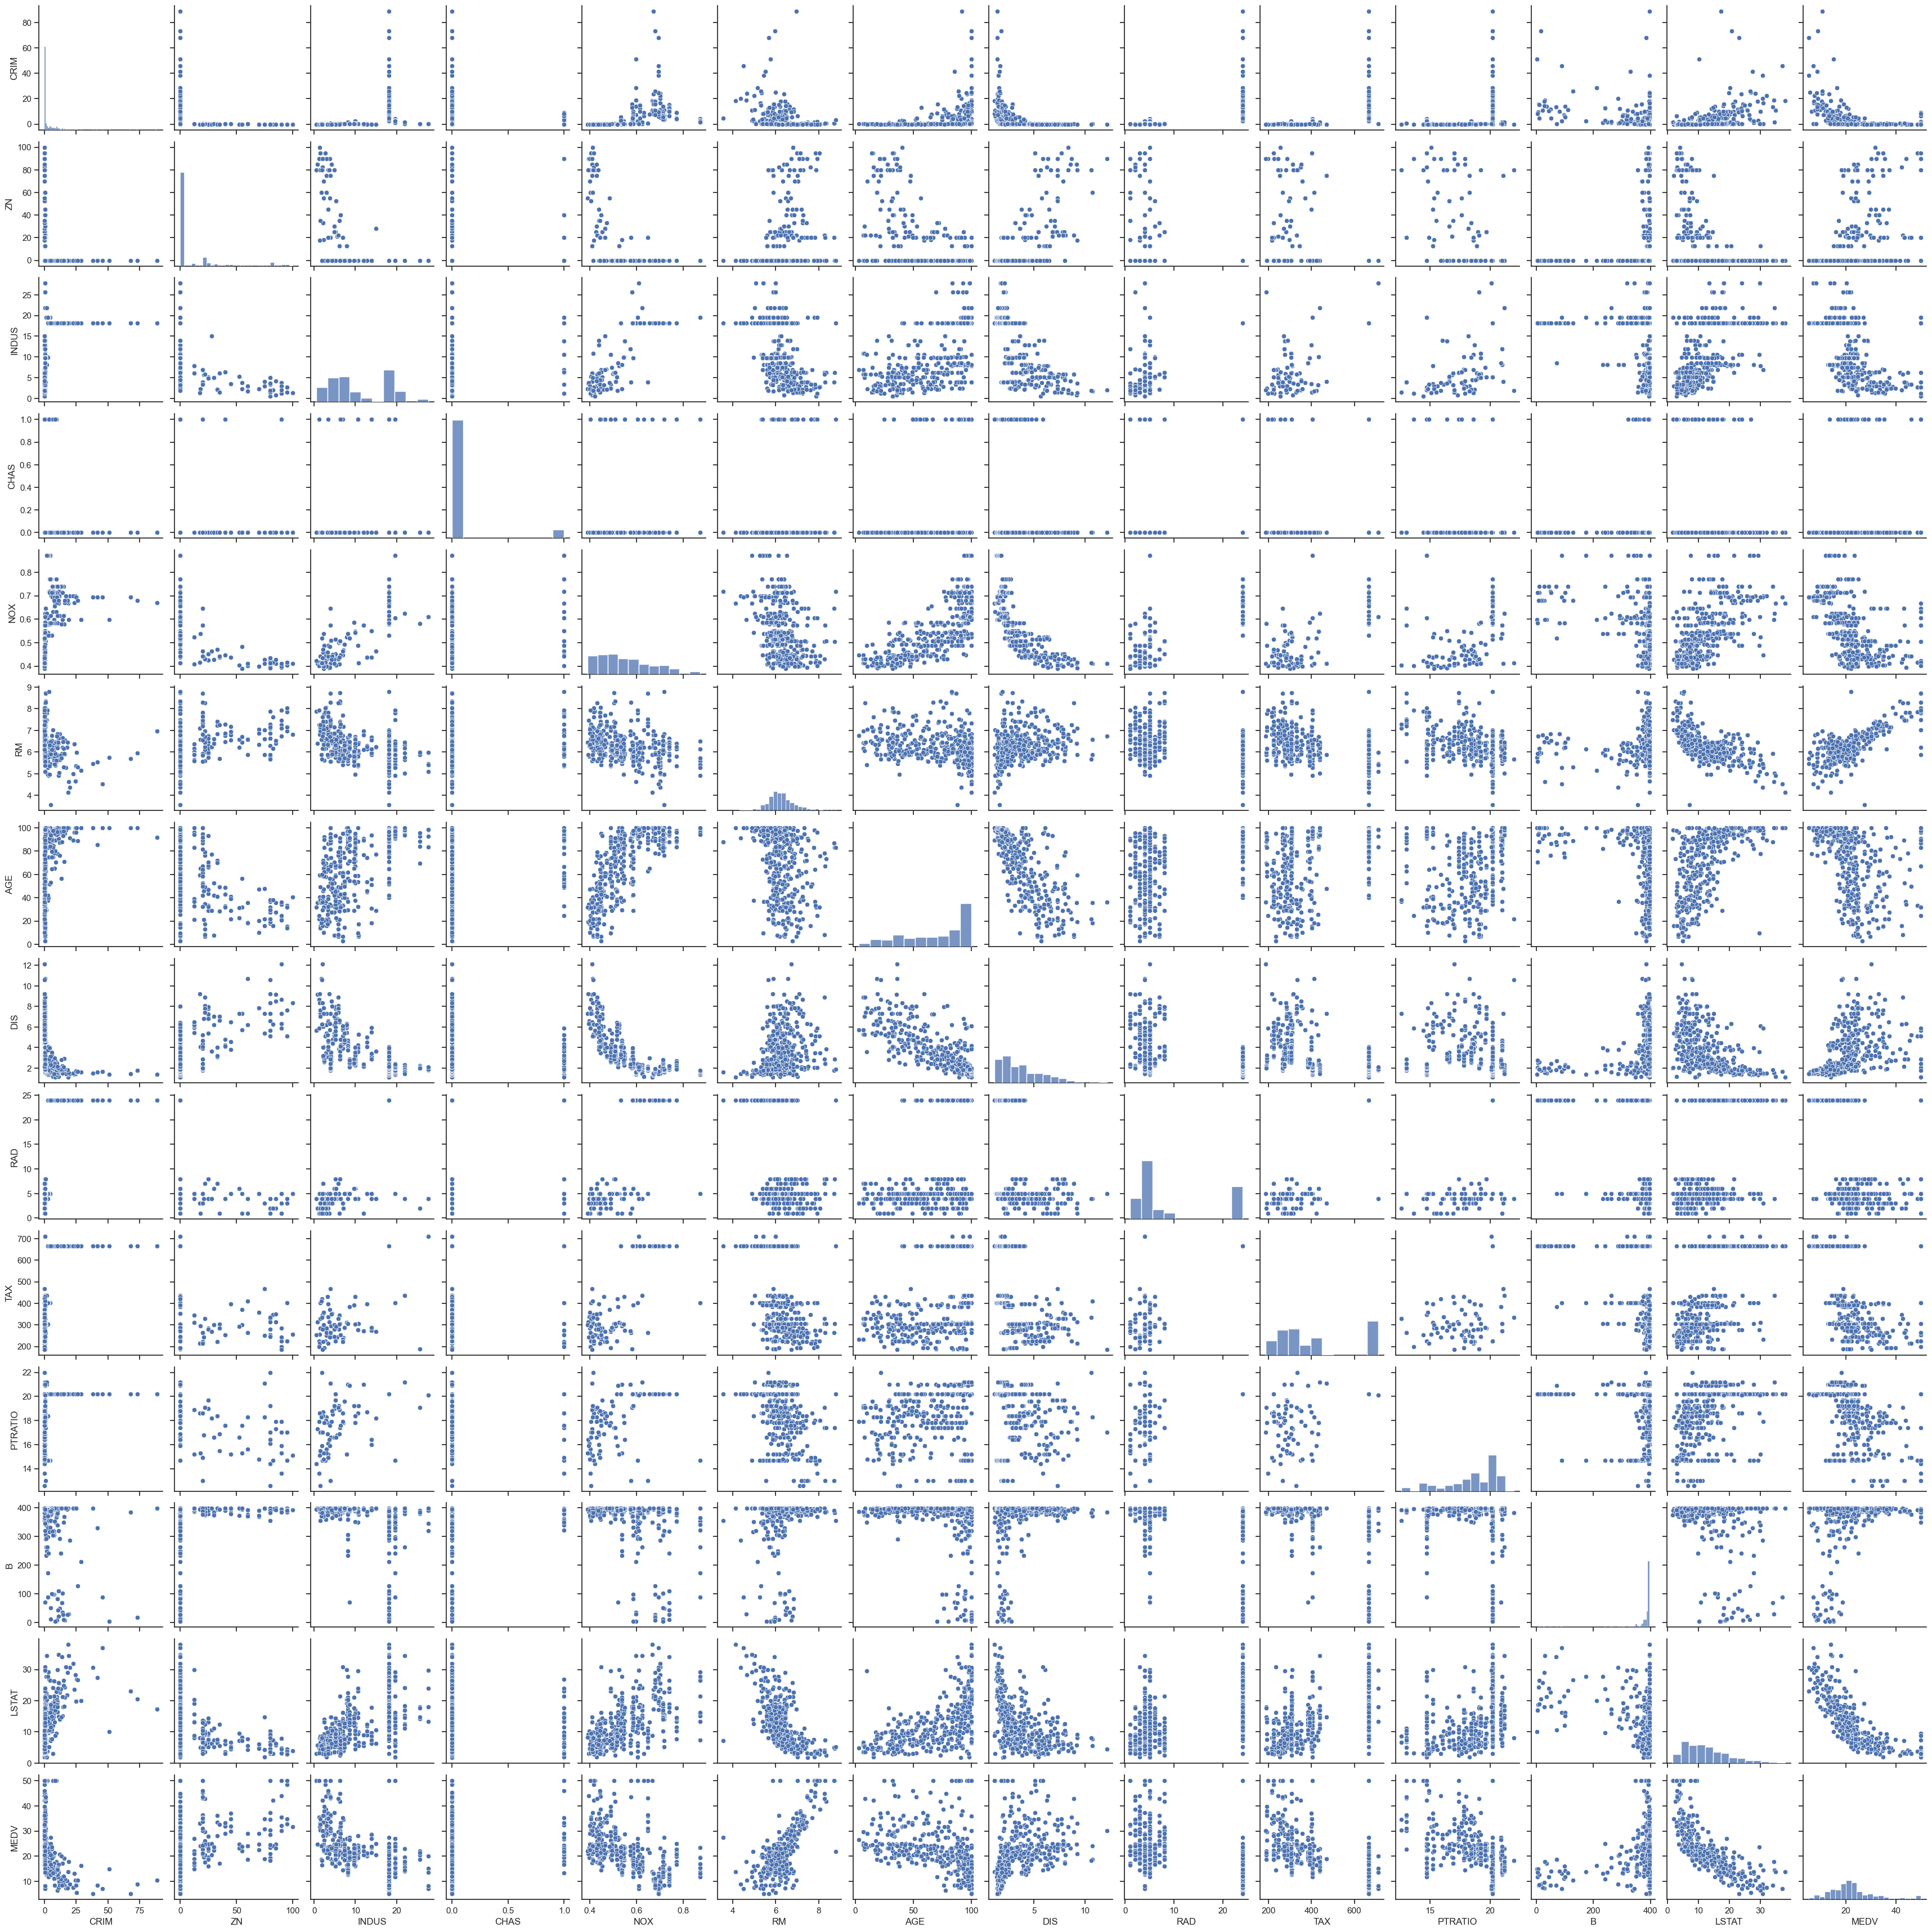

In [112]:
data_pair = data.dropna()

sns.pairplot(data_pair)